<div align="center">
  <b> <font size="6">Simple Linear Regression</font> </b>
</div>

In [166]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [167]:
# Load the dataset into pandas dataframe
df=pd.read_csv("E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\dataset\\Advertising.csv")     
# Change this location based on the location of dataset in your machine

In [168]:
# Display the first five records
df.head()    

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Advertising data comprises four features: TV, radio, newspaper, and sales. It explains the budget (in 1000$) spent on different mass media and the net outcome for every week. 
<ul>
  <li>sales for a product (<b> output/dependent/target variable </b>).</li>
  <li>advertising budget for TV, radio, and newspaper media (<b> input/independent/target variable </b>).</li> 
</ul> 
Planning to perform regression on TV budget (X) as input and sales (Y) as output.

In [169]:
# Dataset shape (number of rows and columns)
df.shape

(200, 4)

<b>Row </b> <=> record, tuple, instance, sample, observation, object, case, entity <br>
<b>Column </b> <=> attribute, variable, field, feature, characteristic, dimension

### Step 2: Apply EDA

##### Univariate analysis

In [170]:
# Statistics summary
df["TV"].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

<AxesSubplot:>

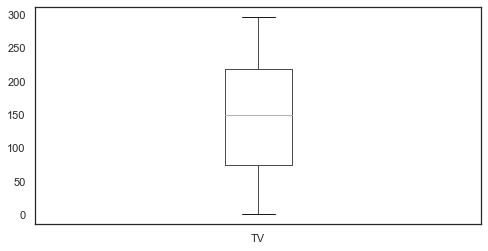

In [171]:
# Univariate Analysis using Boxplot
sns.set_style(style='white') 
df.boxplot(column =['TV'], grid = False)   

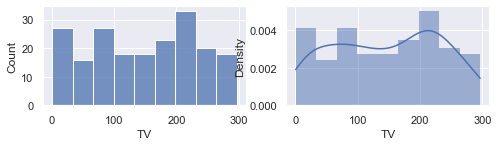

In [172]:
# Distribution plot to find skewness
from pylab import *
sns.set(rc={"figure.figsize": (8, 4)});  

subplot(2,2,1)
ax = sns.histplot(df["TV"])

subplot(2,2,2)
ax = sns.histplot(df["TV"], kde=True, stat="density", linewidth=0)

plt.show()

##### Bivariate analysis

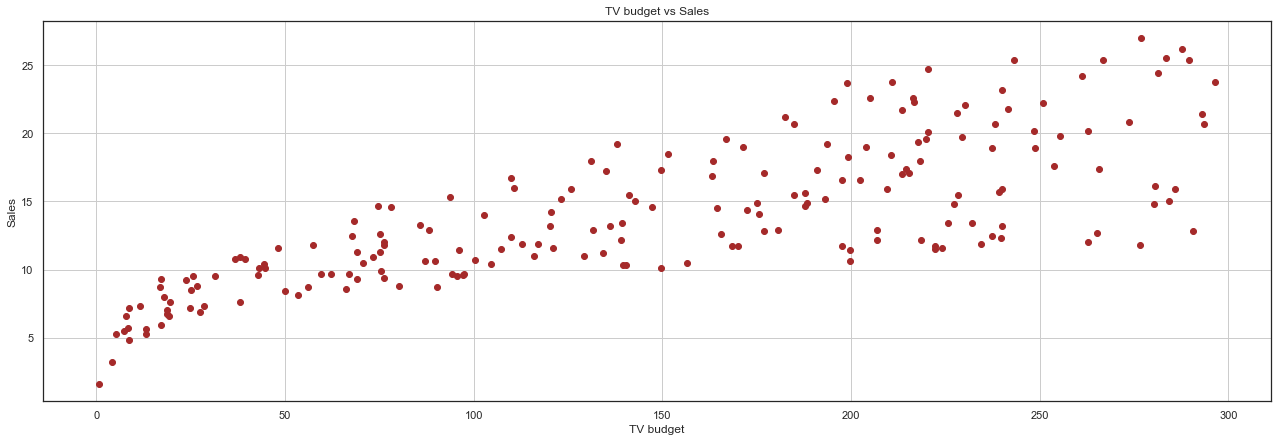

In [173]:
# Scatter plot
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(df["TV"],df["sales"],color="brown")
plt.grid(b=None)
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.show()

In [174]:
# Correlation
r = df["TV"].corr(df["sales"]) 
print("Correlation value : ",round(r,2)*100,"%")
# Spearman's rho
# df["TV"].corr(df["sales"], method='spearman')    
# Kendall's tau
# df["TV"].corr(df["sales"], method='kendall')   

Correlation value :  78.0 %


### Step 3. Pre-process and extract the features

In [175]:
# Load TV into X and sales into Y variable
X = df.iloc[:,0].values.reshape((-1, 1))    # Budget spent on TV
Y = df.iloc[:,3].values                     # Sales

In [176]:
def disp_data(feature1,feature2):
    print('Displaying only 10 records')
    print('-------------------------')
    print('TV budget','|','Sales')
    print('-------------------------')
    count = 0
    for x,y in zip(feature1,feature2):
        if count == 10:
            break
        else:
            print(x,'     ',y)
            count = count + 1

In [177]:
disp_data(X,Y)

Displaying only 10 records
-------------------------
TV budget | Sales
-------------------------
[230.1]       22.1
[44.5]       10.4
[17.2]       9.3
[151.5]       18.5
[180.8]       12.9
[8.7]       7.2
[57.5]       11.8
[120.2]       13.2
[8.6]       4.8
[199.8]       10.6


<b> input feature </b> independent feature or predictor feature. Here, X1 (TV) is the input feature. <br>
<b> output feature </b>  dependent feature or response feature or target feature. Here, Y (sales) is the output feature.

### Step 4. Split the data for training and testing

In [178]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [179]:
print("Training data")
print("==========================")
disp_data(x_train,y_train)

Training data
Displaying only 10 records
-------------------------
TV budget | Sales
-------------------------
[36.9]       10.8
[31.5]       9.5
[142.9]       15.0
[209.6]       15.9
[215.4]       17.1
[102.7]       14.0
[8.6]       4.8
[16.9]       8.7
[125.7]       15.9
[104.6]       10.4


In [180]:
print("Testing data")
print("==========================")
disp_data(x_test,y_test)

Testing data
Displaying only 10 records
-------------------------
TV budget | Sales
-------------------------
[69.2]       11.3
[50.]       8.4
[90.4]       8.7
[289.7]       25.4
[170.2]       11.7
[56.2]       8.7
[8.7]       7.2
[240.1]       13.2
[23.8]       9.2
[197.6]       16.6


### Step 5: Training phase (bulding the model)

In [181]:
# Fitting line on two dimension on the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [182]:
b = model.intercept_

In [183]:
m = model.coef_

In [184]:
print("The linear model is ",'Y = m X + b \n')
print('Y = ',np.round(m[0],3),'X + ',np.round(b,3))

The linear model is  Y = m X + b 

Y =  0.046 X +  7.292


In [185]:
# Predicting the Training set results
y_train_pred = model.predict(x_train)

##### Visualizing the model

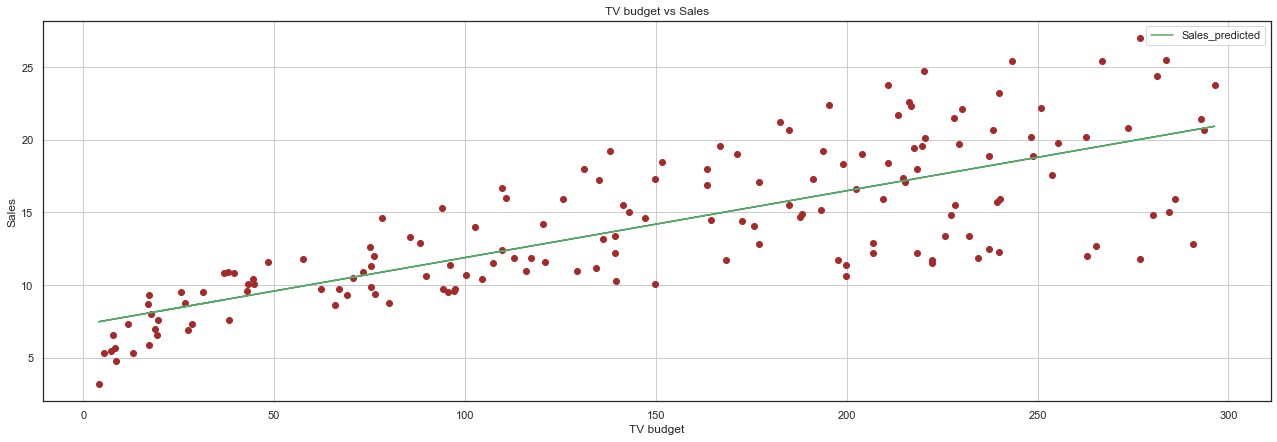

In [186]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(x_train,y_train,color="brown")
plt.grid(b=None) 
plt.plot(x_train,y_train_pred,"g",label="Sales_predicted")
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show()

##### Plotting observed sale (x) and predicted sale (y) for training set

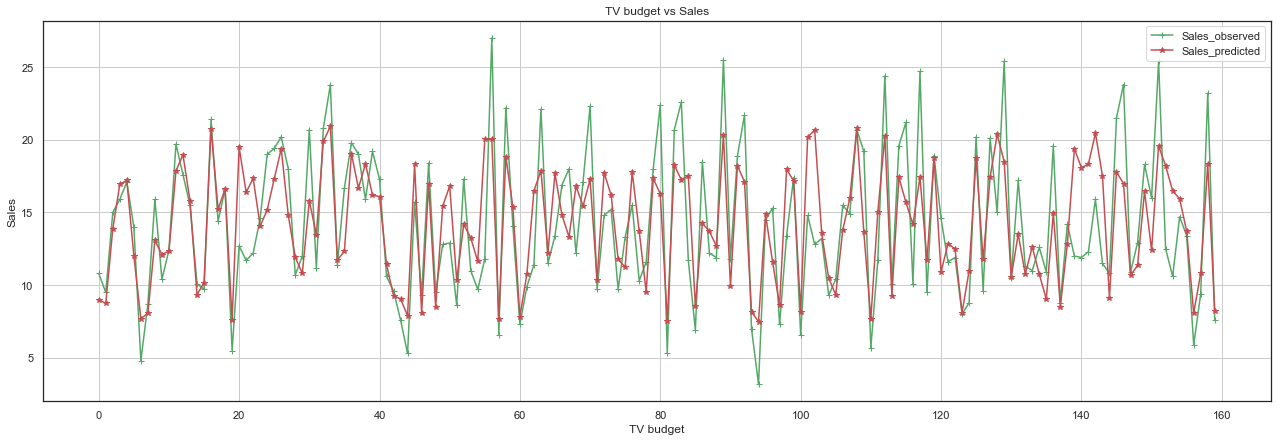

In [187]:
# Predicting the Test set results
x = np.arange(len(y_train_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_train,"g-+",label="Sales_observed")
plt.plot(x,y_train_pred,"r-*",label="Sales_predicted")
plt.grid(b=None) 
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show() 

#### Residual (Error) plot  

If the model has done good predictions, then the datapoints must be near around to horizontal line.

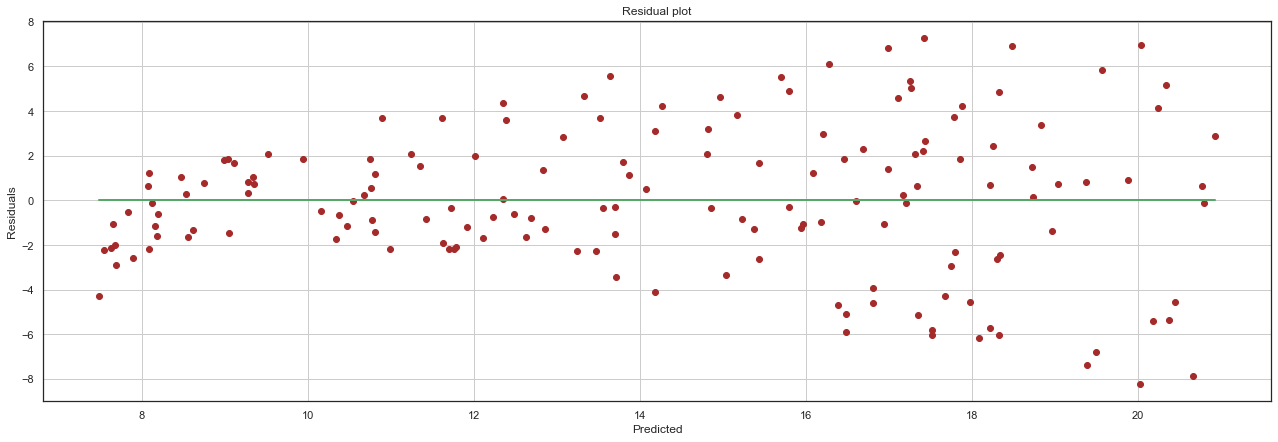

In [188]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_train-y_train_pred
zeros = y_train-y_train
plt.scatter(y_train_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_train_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot") 
plt.show()

### Different error calculations to asses the model for training set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [189]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Train_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Train_SSE)

Sum of Squared Error (SSE) : 1698.76


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [190]:
Train_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Train_MSE)

Mean Squared Error (MSE) : 10.62


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [191]:
Train_RMSE = np.round(np.sqrt(Train_MSE),2)
print("Root Mean Squared Error (RMSE) :",Train_RMSE)

Root Mean Squared Error (RMSE) : 3.26


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [192]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  sum = sum + np.abs(diff)   
Train_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Train_MAE)

Mean Absolute Error (MAE) : 2.58


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [193]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = (y_train[i] - y_train_pred[i])/y_train[i]
  sum = sum + np.abs(diff)  
Train_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Train_MAPE) 

Mean Absolute Percentage Error (MAPE) : 19.54


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [194]:
from sklearn.metrics import r2_score
out = r2_score(y_train,y_train_pred)
Train_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for training set :",Train_RS,"%") 

R-Squred value (goodness of model) for training set : 59.0 %


### Step 6: Testing phase

In [195]:
# Predicting values for test input set
y_test_pred = model.predict(x_test)

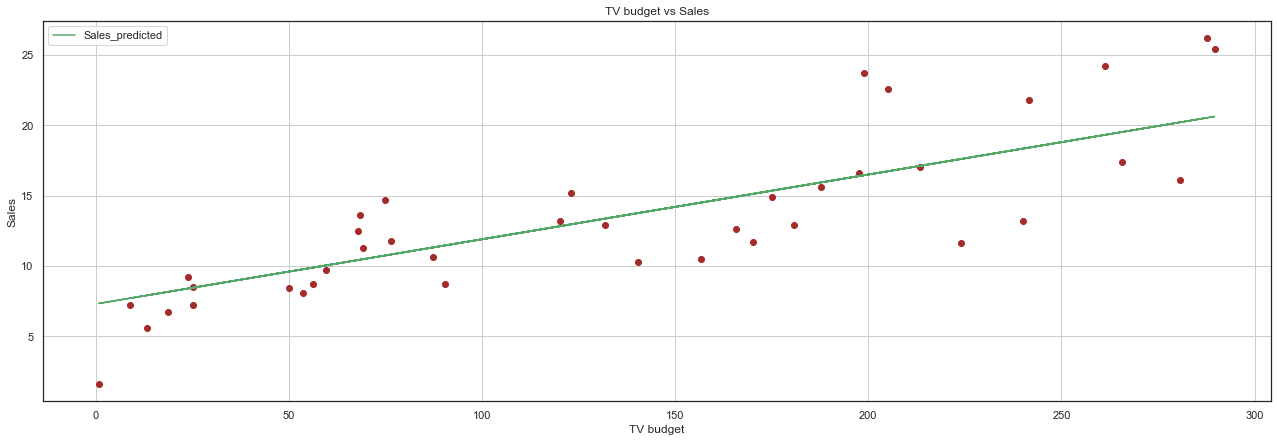

In [196]:
# Plotting the predicted values
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(x_test,y_test,color="brown")
plt.grid(b=None) 
plt.plot(x_test,y_test_pred,"g",label="Sales_predicted")
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show()

##### Plotting observed sale (x) and predicted sale (y) for test set

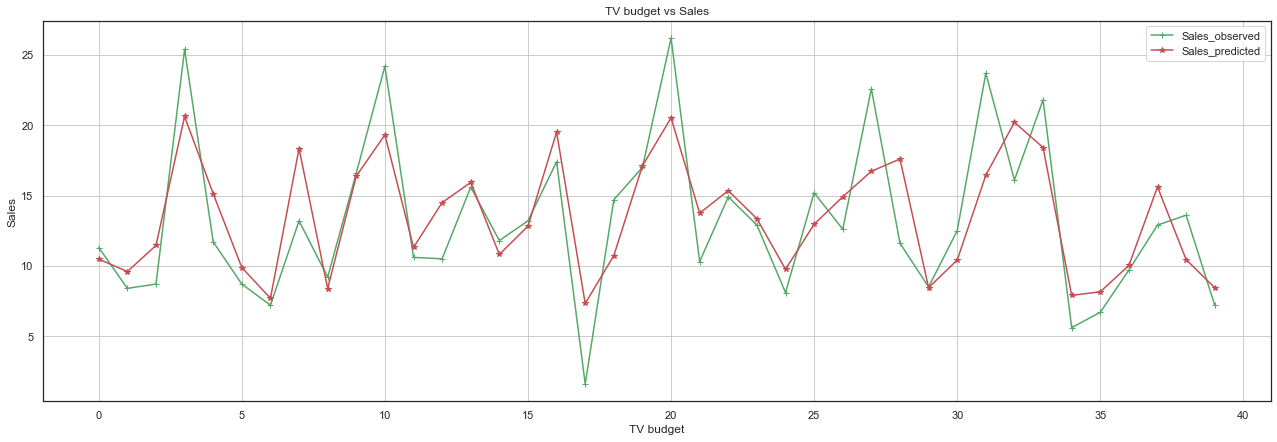

In [197]:
x = np.arange(len(y_test_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_test,"g-+",label="Sales_observed")
plt.plot(x,y_test_pred,"r-*",label="Sales_predicted")
plt.grid(b=None) 
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show() 

#### Residual (Error) plot  

If the model has done good predictions, then the datapoints must be near around to horizontal line.

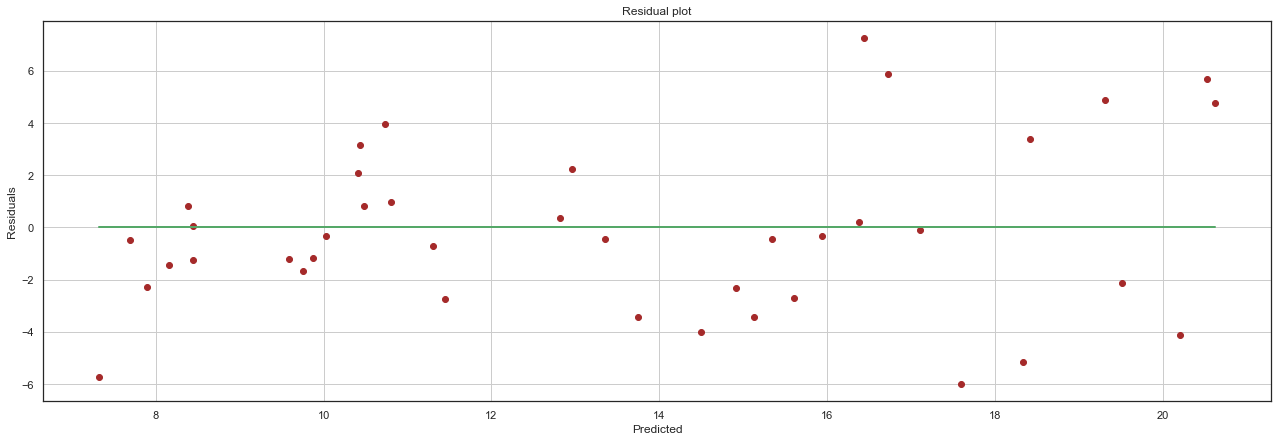

In [198]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_test-y_test_pred
zeros = y_test-y_test
plt.scatter(y_test_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_test_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

#### Storing the outcome in a file

In [199]:
# Store the predicted value for sales in new column
df.rename(columns={'sales': 'observed_sales'}, inplace=True)
sales_data = df.iloc[:,0].values.reshape(-1, 1)
predicted_values = model.predict(sales_data)
df['predicted_sales'] = predicted_values
df.head()

,TV,radio,newspaper,observed_sales,predicted_sales
0,230.1,37.8,69.2,22.1,17.878886
1,44.5,39.3,45.1,10.4,9.339840
2,17.2,45.9,69.3,9.3,8.083828
3,151.5,41.3,58.5,18.5,14.262674
4,180.8,10.8,58.4,12.9,15.610702


In [200]:
# Write the above output input into new csv
# df.to_csv("1.Linear Regression SKLearn - output.csv") 

### Different error calculations to asses the model for the test set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [201]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Test_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Test_SSE)

Sum of Squared Error (SSE) : 407.45


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [202]:
Test_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Test_MSE)

Mean Squared Error (MSE) : 42.47


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [203]:
Test_RMSE = np.round(np.sqrt(Test_MSE),2)
print("Root Mean Squared Error (RMSE) :",Test_RMSE)

Root Mean Squared Error (RMSE) : 6.52


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [204]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  sum = sum + np.abs(diff)   
Test_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Test_MAE)

Mean Absolute Error (MAE) : 2.51


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [205]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = (y_test[i] - y_test_pred[i])/y_test[i]
  sum = sum + np.abs(diff)   
Test_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Test_MAPE) 

Mean Absolute Percentage Error (MAPE) : 26.4


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [206]:
from sklearn.metrics import r2_score
out = r2_score(y_test,y_test_pred)
Test_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for testing set :",Test_RS,"%")  

R-Squred value (goodness of model) for testing set : 68.0 %


### Underfitting and overfitting observation

In [207]:
print("Error \t From training phase       From testing phase ")
print("===================================================")
print("SSE   \t\t",Train_SSE,"\t\t", Test_SSE)
print("MSE   \t\t",Train_MSE,"\t\t\t", Test_MSE)
print("RMSE   \t\t",Train_RMSE,"\t\t\t", Test_RMSE)
print("MAE   \t\t",Train_MAE,"\t\t\t", Test_MAE)
print("RS   \t\t",Train_RS,"\t\t\t", Test_RS)

Error 	 From training phase       From testing phase 
SSE   		 1698.76 		 407.45
MSE   		 10.62 			 42.47
RMSE   		 3.26 			 6.52
MAE   		 2.58 			 2.51
RS   		 59.0 			 68.0


### Predict the sale for amount of money spent on advertisement via TV

In [208]:
# If 60$ is spent on TV advertisement what is the expected sales? Rember input 60$ is neither in train set nor test set
model.predict([[60]])

array([10.05296115])

### Storing and retrieving the model

##### Using pickle

In [209]:
# import necessary library
import pickle 

In [210]:
# store the model in disks
with open('E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\code\\2.REGRESSION\\pickled_linear_model','wb') as f:
    pickle.dump(model,f)

In [211]:
# load the saved model 
with open('E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\code\\2.REGRESSION\\pickled_linear_model','rb') as f:
    model = pickle.load(f)

In [212]:
# If 60$ is spent on TV advertisement what is the expected sales?
model.predict([[60]])

array([10.05296115])

##### Using joblib

In [213]:
# import necessary library
import joblib

In [214]:
# store the model in disks
joblib.dump(model,'E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\code\\2.REGRESSION\\pickled_linear_model_joblib')

['E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\code\\2.REGRESSION\\pickled_linear_model_joblib']

In [215]:
# load the saved model 
model = joblib.load('E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\code\\2.REGRESSION\\pickled_linear_model_joblib')

In [216]:
# If 60$ is spent on TV advertisement what is the expected sales?
model.predict([[60]])

array([10.05296115])